In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

in_array = np.linspace(-3, 4, 100) 

In [3]:
def curve1(in_array_ ):
    return (in_array_**3) + ((in_array_*.9-4)**2)

def curve2(in_array_ ):
    return (20*np.sin((in_array_)*3+4)+20) + curve1(in_array_ )
    
x = in_array
curve = np.piecewise(x, [x<.2, x >=.2], [lambda x: curve1(x), lambda x: curve2(x)])  
    
x = in_array
curve = np.piecewise(x, [x<.2, x >=.2], [lambda x: curve1(x), lambda x: curve2(x)])  

In [4]:

flux_range = 35
random_flux = np.random.rand(len(curve))*flux_range - flux_range/2
noisy_data =  curve + random_flux
sampling_increment = 15
sparse_input = in_array[::sampling_increment]
sparse_data =     curve[::sampling_increment]

In [5]:
y_axis_label = 'altitude (feet)'
x_axis_label = 'time (seconds from arrival at target)'
title = 'Trajectory of flight'
figure_proportions = (14, 7)
figure_proportions = (10, 5)
y_max = 100
x_min = -3.3
x_max = 4.3 

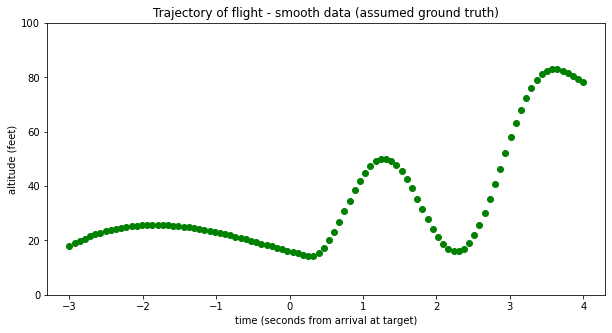

In [6]:
custom_title = title + ' - smooth data (assumed ground truth)'
plt.figure(figsize=figure_proportions ) 
plt.scatter(in_array, curve, color = 'green', marker = "o") 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

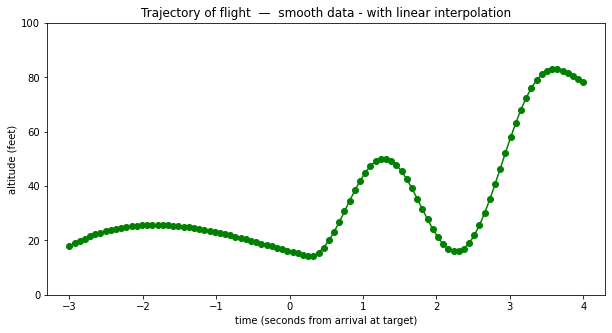

In [9]:
custom_title = title + '  —  smooth data' + ' - with linear interpolation'
plt.figure(figsize=figure_proportions ) 
plt.plot(in_array, curve, color = 'green', marker = "o") 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

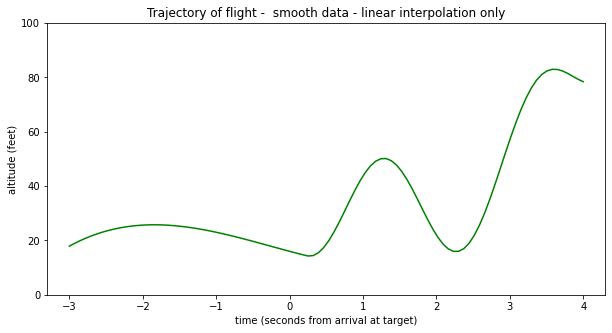

In [10]:
custom_title = title + ' -  smooth data' + ' - linear interpolation only'
plt.figure(figsize=figure_proportions ) 
plt.plot(in_array, curve, color = 'green') 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

## smoothing through linear regression with polynomials
First show dense, smooth, and sparse scatterplots based on x^3

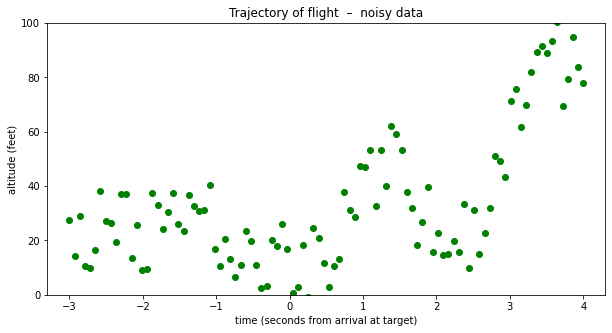

In [11]:
custom_title = title + '  –  noisy data'

plt.figure(figsize=figure_proportions)

plt.scatter(in_array, noisy_data, color = 'green', marker = "o") 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

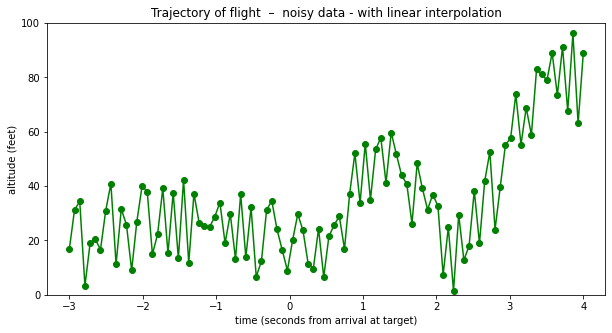

In [8]:
custom_title = title + '  –  noisy data - with linear interpolation'
plt.figure(figsize=figure_proportions)

plt.plot(in_array, noisy_data, color = 'green', marker = "o") 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label)
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show()

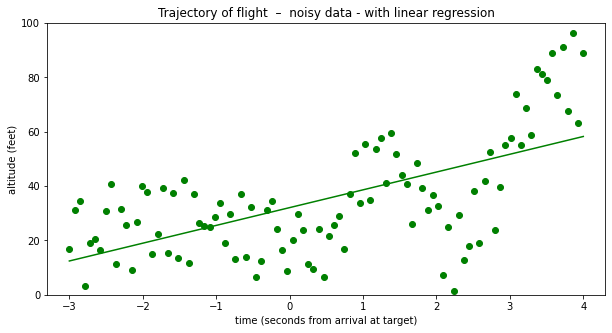

In [9]:
custom_title = title + '  –  noisy data' + ' - with linear regression'

m, b = np.polyfit(in_array, noisy_data, 1)

#add linear regression line to scatterplot 

plt.figure(figsize=figure_proportions)

plt.scatter(in_array, noisy_data, color = 'green', marker = "o")
plt.plot(in_array, m*x+b, color = 'green')
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 


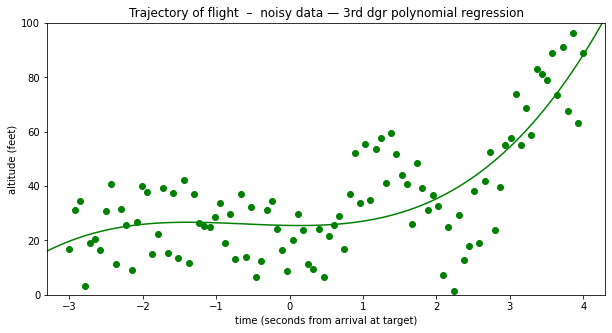

In [10]:
custom_title = title + '  –  noisy data' + ' — 3rd dgr polynomial regression'

from numpy.polynomial import polynomial as P
z = np.polyfit(in_array, noisy_data, 3)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

plt.figure(figsize=figure_proportions)

plt.scatter(in_array, noisy_data, color = 'green', marker = "o")
plt.plot(xp, p(xp), color = 'green')
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

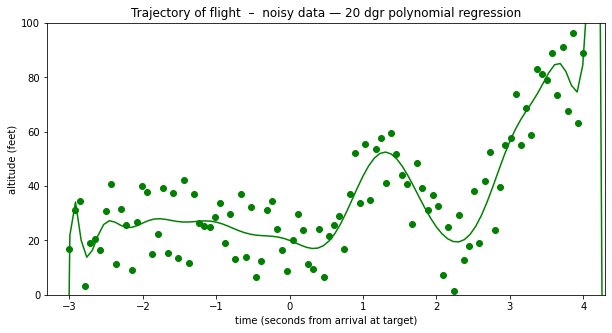

In [11]:
custom_title = title + '  –  noisy data' + ' — 20 dgr polynomial regression'

z = np.polyfit(in_array, noisy_data, 20)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

plt.figure(figsize=figure_proportions)

plt.scatter(in_array, noisy_data, color = 'green', marker = "o")
plt.plot(xp, p(xp), color = 'green')
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

In [12]:
import pandas as pd

noisy_data_series = pd.Series(noisy_data)
mvg_avg_by_3 = noisy_data_series.rolling(3).mean()
mvg_avg_by_5 = noisy_data_series.rolling(5).mean()
mvg_avg_by_7 = noisy_data_series.rolling(7).mean()
mvg_avg_by_10 = noisy_data_series.rolling(10).mean()

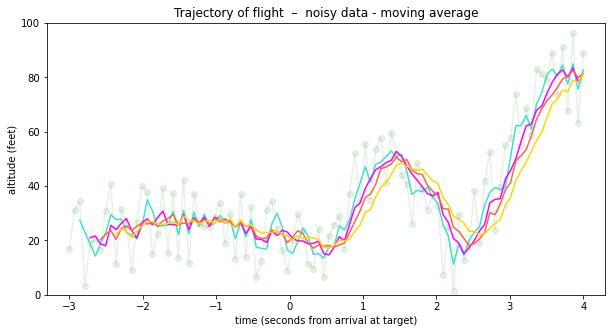

In [13]:
custom_title = title + '  –  noisy data - moving average'
plt.figure(figsize=figure_proportions)

plt.plot(in_array, noisy_data, color = 'green', marker = "o", alpha=.1)
plt.plot(in_array, mvg_avg_by_3, color = 'turquoise') 
plt.plot(in_array, mvg_avg_by_5, color = 'magenta') 
plt.plot(in_array, mvg_avg_by_7, color = 'tomato')
plt.plot(in_array, mvg_avg_by_10, color = 'gold') 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label ) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show()

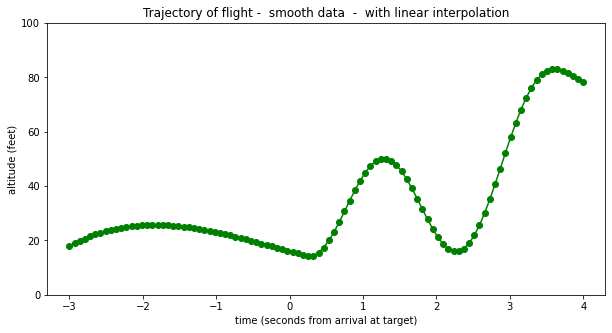

In [14]:
custom_title = title + ' -  smooth data' + '  -  with linear interpolation'
plt.figure(figsize=figure_proportions) 
plt.plot(in_array, curve, color = 'green', marker = "o") 
plt.title(custom_title) 
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

### Make multiple versions of this graph as scatter plots
1. Sparse with most points randomly ommitted
2. Dense and noisy: Many random points above and below like a flock
3. Idiealized: show the one as above, with even points

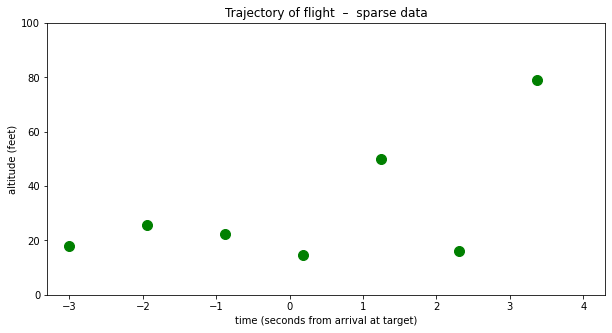

In [15]:
custom_title = title + '  –  sparse data'

plt.figure(figsize=figure_proportions) 
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100) 

plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

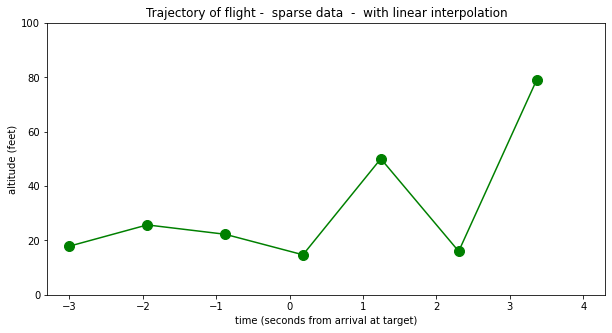

In [16]:
custom_title = title + ' -  sparse data' + '  -  with linear interpolation'

plt.figure(figsize=figure_proportions) 
plt.plot(sparse_input, sparse_data, color = 'green', marker = "o") 
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100) 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

In [ ]:
custom_title = title + ' - sparse data' + ' -  with linear regression'

m, b = np.polyfit(sparse_input, sparse_data, 1)

plt.figure(figsize=figure_proportions) 
plt.plot(in_array, m*x+b, color = 'green')
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100) 

plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

In [ ]:
custom_title = title + '  – sparse data' + ' - 3rd dgr polynomial regression'

z = np.polyfit(sparse_input, sparse_data, 3)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

plt.figure(figsize=figure_proportions)

plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)
plt.plot(xp, p(xp), color = 'green')
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

In [ ]:
custom_title = title + '  –  sparse data' + ' -  6th dgr polynomial regression'

z = np.polyfit(sparse_input, sparse_data, 6)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

plt.figure(figsize=figure_proportions)

plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)
plt.plot(xp, p(xp), color = 'green')
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

In [ ]:
custom_title = title + '  –  sparse data - with moving average'

sparse_data_series = pd.Series(sparse_data)
mvg_avg_by_2 = sparse_data_series.rolling(2).mean()
mvg_avg_by_3 = sparse_data_series.rolling(3).mean()
mvg_avg_by_5 = sparse_data_series.rolling(5).mean()


plt.figure(figsize=figure_proportions)


plt.plot(sparse_input, sparse_data, color = 'green', marker = "o", alpha=.05)
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100, alpha=.05) 

plt.plot(sparse_input, mvg_avg_by_2, color = 'green') 
plt.plot(sparse_input, mvg_avg_by_3, color = 'turquoise') 
plt.plot(sparse_input, mvg_avg_by_5, color = 'magenta') 

plt.title(custom_title) 

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show()

Show line graphs for 1 and 2 to see how they are inadequate

Possibly discuss doing a polynomial regression

### Explain and demonstrate Lowess (Locally weighted ...)

show what can go wrong when applying to this to the sparse situation

In [ ]:
custom_title = title + '  –  noisy data' + ' - with lowess curve (Seaborn lmplot)'

import seaborn as sns
import pandas as pd

plt.figure(figsize=figure_proportions)
plot_df = pd.DataFrame({'time': in_array, 'altitude': noisy_data})

g=sns.lmplot(x='time', y='altitude', data=plot_df, \
             lowess=True, scatter_kws={'color': 'green'}, line_kws={'color': 'green'},\
             height = figure_proportions[1]*.8, aspect = figure_proportions[0]/figure_proportions[1]);
g.set(title=custom_title)
g.set(ylim=(0, y_max))
g.set(xlim=(x_min, x_max))
g.savefig('viz/'+custom_title+'.svg')

In [ ]:
custom_title = title + '  –  sparse data' + ' - with lowess curve (Seaborn lmplot)'

import seaborn as sns
import pandas as pd

plt.figure(figsize=figure_proportions)
plot_df = pd.DataFrame({'time': sparse_input, 'altitude': sparse_data})

g=sns.lmplot(x='time', y='altitude', data=plot_df, \
             lowess=True, truncate=True, scatter_kws={'color': 'green'}, line_kws={'color': 'green'},\
             height = figure_proportions[1]*.8, aspect = figure_proportions[0]/figure_proportions[1]);
g.set(title=custom_title)
g.set(ylim=(0, y_max))
g.set(xlim=(x_min, x_max))
g.savefig('viz/'+custom_title+'.svg')

In [ ]:
custom_title = title + '  –  noisy data' + ' with lowess smoothing: tight (12% bins) and looser (20% bins)'
from statsmodels.nonparametric.smoothers_lowess import lowess

y_lowess_tight = lowess(noisy_data, in_array, frac = .12)
y_lowess_loose = lowess(noisy_data, in_array, frac = .2)

plt.figure(figsize=figure_proportions)

plt.scatter(in_array, noisy_data, color = 'green', marker = "o", alpha=.3)
plt.plot(y_lowess_tight[:,0], y_lowess_tight[:,1], color = 'lightseagreen', lw=3)
plt.plot(y_lowess_loose[:,0],  y_lowess_loose[:,1], color = 'olive', lw=3)

plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 



compare to `moving average`

In [ ]:
custom_title = title + '  –  sparse data' +   ' — with lowess smoothing: loose (20% bins) and looser (60% bins)'

y_lowess_tight = lowess(sparse_data, sparse_input, frac = .20)
y_lowess_loose = lowess(sparse_data, sparse_input, frac = .60)

plt.figure(figsize=figure_proportions)

plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)
plt.plot(sparse_input, y_lowess_tight[:,1], color = 'lightseagreen', lw=3)
plt.plot(sparse_input,  y_lowess_loose[:,1], color = 'olive', lw=3)

plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

### Explain and demonstrate spline
piecewise polynomial (usually cubic)

In [ ]:
custom_title = title + '  –  sparse data' +   ' - with B-Spline'
import scipy

x_interp = np.linspace(x_min, x_max, 100)
BSpline = scipy.interpolate.make_interp_spline(sparse_input, sparse_data, 2)
y_BSpline = BSpline(x_interp)

plt.figure(figsize=figure_proportions)
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)
plt.plot(x_interp, y_BSpline, color='green')



plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 


In [ ]:
sampling_increment = 9
sparse_input = in_array[::sampling_increment]
sparse_data =     curve[::sampling_increment]

In [ ]:
custom_title = title + ' - sparse data (sampling increment = 10)'

plt.figure(figsize=figure_proportions) 
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100) 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

In [ ]:
custom_title = title + ' - sparse data (sampling increent = 10) with linear spline'

plt.figure(figsize=figure_proportions) 
plt.plot(sparse_input, sparse_data, color = 'green', marker = "o") 
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100) 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

In [ ]:
custom_title = title + ' - sparse data (sampling increment = 10) '+   ' - with B-Spline'

BSpline = scipy.interpolate.make_interp_spline(sparse_input, sparse_data, 2)
y_BSpline = BSpline(x_interp)


plt.figure(figsize=figure_proportions)
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)
plt.plot(x_interp, y_BSpline, color='green')



plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

In [ ]:
custom_title = title + ' - noisy data '+   ' -  with B-Spline'

BSpline = scipy.interpolate.make_interp_spline(in_array, noisy_data, 2)
y_BSpline = BSpline(x_interp)


plt.figure(figsize=figure_proportions)
plt.scatter(in_array, noisy_data, color = 'green', marker = "o", s=100)
plt.plot(x_interp, y_BSpline, color='green')



plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 